In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('../ordo')

In [2]:
models = {
    '00000' : 0,
    'newplane_from00000_100_1000bs2048lr0.1d0.001e3' : 1000,
    'from00000_150_1500bs2048lr0.1d0.001e3' : 1500,
    'scr_dl_200_2000bs2048lr0.1d0.001e3' : 2000,
    '250_2500bs2048lr0.1d0.001e4' : 2500,
    '300_3000bs2048lr0.1d0.001e4' : 3000,
    '350_3500bs2048lr0.1d0.001e5' : 3500,
    '400_4000bs2048lr0.1d0.001e4' : 4000,
    '450_4500bs2048lr0.1d0.001e4' : 4500,
    '500_5000bs2048lr0.1d0.001e4' : 5000,
    '600_6000bs2048lr0.1d0.001e4' : 6000,
    '700_7000bs2048lr0.1d0.001e4' : 7000,
    '800_8000bs2048lr0.1d0.001e4' : 8000,
    '900_9000bs2048lr0.1d0.001e5' : 9000,
    '1000_10000bs2048lr0.1d0.001e5' : 10000,
    '1100_11000bs2048lr0.1d0.001e5' : 11000,
    '1200_12000bs2048lr0.1d0.001e5' : 12000,
    '1300_13000bs2048lr0.1d0.001e5' : 13000,
}

In [3]:
n = max(models.values())
filename = f'net{n}.txt'
print('Reading ' + filename)
lines = []
with open(filename, 'r') as f:
    f.readline()
    f.readline()
    x = f.readline()
    while x != '\n':
        lines.append(x)
        x = f.readline()

Reading net13000.txt


In [4]:
ngames = []
rating = []
errors = []
for line in lines:
    line = line.split()
    ngames.append(models[line[1]])
    rating.append(float(line[3]))
    try:
        errors.append(float(line[4]))
    except ValueError:
        errors.append(0.0)

In [5]:
results = pd.DataFrame(data={'ngames': ngames,
                             'rating': rating,
                             'errors': errors})
results = results.sort_values('ngames')

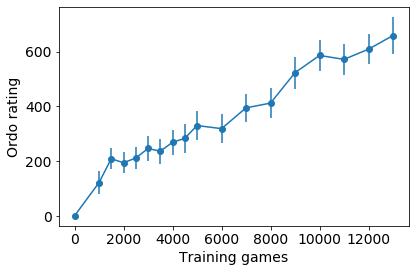

In [6]:
plt.rcParams.update({'font.size': 14})
plt.errorbar(results['ngames'], 
             results['rating'],
             results['errors'],
             fmt='o-')
plt.ylabel('Ordo rating')
plt.xlabel('Training games')
plt.tight_layout()
plt.savefig('../images/Ordo.png', dpi=200)
plt.show()